##Системы искусственного интеллекта

##ЛР4. Decision Tree
[10 баллов]

## Этапы

Задание состоит в детальном изучении данных и построении модели предсказания стоимости объекта недвижимости.

Что входит в работу:

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.


-------------

## Задание

Мы будем работать с данными из [датасета](https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021), в котором содержится информация об объектах недвижимости в России с их стоимостью за 2018-2021 гг.

*   Цена — Цена в рублях РФ (*числовое*)
*   Дата — дата публикации объявления (*временное*)
*   Время — время публикаци объявления (*временное*)
*   Коорданата x — значение координаты (широта) (*числовое*)
*   Коорданата y — значение координаты (долгота) (*числовое*)
*   Номер — код региона РФ (*категориальное*)
*   Тип здания — тип сооружения, в котором находится квартира (*категориальное*)
*   Этаж — номер этажа, на котором находится квартира (*категориальное* или *числовое*?)
*   Число этажей в доме — общее количество этажей в здании (*категориальное* или *числовое*?)
*   Комнаты — количество комнат в квартире, -1 означает студии с открытой планировкой (*категориальное* или *числовое*?)
*   Площадь — общая площадь квартиры в кв. метрах (*числовое*)
*   Площадь кухни — площадь кухни в кв. метрах (*числовое*)
*   Тип квартиры — тип квартиры, где 1 означает вторичный рынок недвижимости, 11 - новостройка (*категориальное*)

<font color='CornflowerBlue'>**Целевой переменной (target, y)**</font> будем считать цену (столбец `price`)

### **0. Загружаем данные**

In [16]:
# ! gdown 13swGEWvhO4iurSN8Rddap4AHo1pAAljMl
# ! unzip 'rus_real_estate.zip'

In [17]:
 # Прописываем путь к папке с файлом
# path = '/content/rus_real_estate.csv'
path = 'rus_real_estate.csv'

In [18]:
region_name = {
    '2661': 'Санкт-Петербург',
    '3446': 'Ленинградская область',
    '3': 'Москва',
    '81': 'Московская область',
    '2843': 'Краснодарский край',
    '2871': 'Нижегородская область',
    '3230': 'Ростовская область',
    '3106': 'Самарская область',
    '2922': 'Республика Татарстан',
    '2900': 'Ставропольский край',
    '2722': 'Республика Башкортостан',
    '6171': 'Свердловская область',
    '4417': 'Республика Коми',
    '5282': 'Челябинская область',
    '5368': 'Иркутская область',
    '5520': 'Пермский край',
    '6817': 'Алтайский край',
    '9579': 'Республика Бурятия',
    '2604': 'Ярославская область',
    '1010': 'Удмуртская Республика',
    '7793': 'Псковская область',
    '13919': 'Республика Северная Осетия — Алания',
    '2860': 'Кемеровская область',
    '3019': 'Чувашская Республика',
    '4982': 'Республика Марий Эл',
    '9648': 'Кабардино-Балкарская Республика',
    '5241': 'Республика Мордовия',
    '3870': 'Красноярский край',
    '3991': 'Тюменская область',
    '2359': 'Республика Хакасия',
    '9654': 'Новосибирская область',
    '2072': 'Воронежская область',
    '8090': 'Республика Карелия',
    '4007': 'Республика Дагестан',
    '11171': 'Республика Саха (Якутия)',
    '10160': 'Забайкальский край',
    '7873, 6937': 'Республика Крым',
    '2594': 'Кировская область',
    '8509': 'Республика Калмыкия',
    '11416': 'Республика Адыгея',
    '11991': 'Карачаево-Черкесская Республика',
    '5178': 'Республика Тыва',
    '13913': 'Республика Ингушетия',
    '6309': 'Республика Алтай',
    '5952': 'Белгородская область',
    '6543': 'Архангельская область',
    '2880': 'Тверская область',
    '5993': 'Пензенская область',
    '2484': 'Ханты-Мансийский автономный округ',
    '4240': 'Липецкая область',
    '5789': 'Владимирская область',
    '14880': 'Ямало-Ненецкий автономный округ',
    '1491': 'Рязанская область',
    '2885': 'Чеченская Республика',
    '5794': 'Смоленская область',
    '2528': 'Саратовская область',
    '4374': 'Вологодская область',
    '4695': 'Волгоградская область',
    '2328': 'Калужская область',
    '5143': 'Тульская область',
    '2806': 'Тамбовская область',
    '14368': 'Мурманская область',
    '5736': 'Новгородская область',
    '7121': 'Курская область',
    '4086': 'Хабаровский край',
    '821': 'Брянская область',
    '10582': 'Астраханская область',
    '7896': 'Калининградская область',
    '8640': 'Омская область',
    '5703': 'Курганская область',
    '10201': 'Томская область',
    '4249': 'Ульяновская область',
    '3153': 'Оренбургская область',
    '4189': 'Костромская область',
    '2814': 'Орловская область',
    '13098': 'Камчатский край',
    '8894': 'Ивановская область',
    '7929': 'Амурская область',
    '16705': 'Магаданская область',
    '69': 'Еврейская автономная область',
    '4963': 'Приморский край',
    '1901': 'Сахалинская область',
    '61888': 'Ненецкий автономный округ'
}

### **<font color='DarkOrange'> Задача 1. [1 балл]</font>**

1.Сделайте первичную обработку данных:

1.1. Выберите один любой регион/город, для которого достаточно данных для построения модели, и оставьте выборку только для этого региона/города. Напишите, какой город выбрали

1.2. Удалите некорректные записи и выбросы

1.3. Создайте дополнительную колонку 'year' - год продажи

1.4. Удалите колонки 'date' и 'time'

1.5. Исключите 1% с каждого хвоста распределения по целевой переменной

1.6. Исключите 1% с каждого хвоста распределения по тем переменным, по которым Вам кажется важно это сделать

1.7. Исследуйте, какие еще признаки можно преобразовать различными способами, например, нелинейная трансформация и пр. Выберите такие признаки и преобразуйте их

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv(path)

print(df['region'].value_counts().head())

df = df[df['region'] == 2661]
print("Выбран регион:", region_name['2661'])

# === 1.2. Удаление некорректных и выбросных значений ===
df = df.dropna(subset=['price', 'area', 'rooms'])
df = df[(df['price'] > 0) & (df['area'] > 0)]

# === 1.3. Создание колонки 'year' ===
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# === 1.4. Удаление ненужных колонок ===
df = df.drop(columns=['date', 'time'], errors='ignore')

# === 1.5. Исключение 1% хвостов по целевой переменной (например, price) ===
low, high = df['price'].quantile([0.01, 0.99])
df = df[(df['price'] >= low) & (df['price'] <= high)]

# === 1.6. Исключение хвостов по важным переменным (например, area, rooms) ===
for col in ['area', 'rooms']:
    low, high = df[col].quantile([0.01, 0.99])
    df = df[(df[col] >= low) & (df[col] <= high)]

# === 1.7. Преобразования признаков ===
# Логарифмируем цену и площадь для нормализации распределения
df['log_price'] = np.log1p(df['price'])
df['log_area'] = np.log1p(df['area'])

# Преобразуем категориальные признаки в числовые (пример: тип жилья)
if 'building_type' in df.columns:
    df['building_type'] = df['building_type'].astype('category').cat.codes

print(df.info())
print(df.head())


region
9654.0    3857
2843.0    2088
81.0      1625
3.0        947
2661.0     781
Name: count, dtype: int64
Выбран регион: Санкт-Петербург
<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 14095
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          745 non-null    int64  
 1   geo_lat        745 non-null    float64
 2   geo_lon        745 non-null    float64
 3   region         745 non-null    float64
 4   building_type  745 non-null    int8   
 5   level          745 non-null    float64
 6   levels         745 non-null    float64
 7   rooms          745 non-null    float64
 8   area           745 non-null    float64
 9   kitchen_area   745 non-null    float64
 10  object_type    745 non-null    float64
 11  year           745 non-null    int32  
 12  log_price      745 non-null    float64
 13  log_area       745 non-null    float64
dtypes: float64(11), int32(1), int64(1), int8(1)
memory

2.Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [20]:
print(df.head(10))
print(df.describe(include='all'))

       price    geo_lat    geo_lon  region  building_type  level  levels  \
0    6050000  59.805808  30.376141  2661.0              1    8.0    10.0   
7    3600000  59.875526  30.395457  2661.0              1    2.0     5.0   
36   3200000  59.827465  30.201827  2661.0              1    7.0     9.0   
47   6500000  59.988334  29.786928  2661.0              3    3.0     3.0   
54   6300000  59.911622  30.284556  2661.0              3    5.0     5.0   
66   7100000  60.011172  30.243795  2661.0              3    7.0    12.0   
69   8500000  59.849104  30.314112  2661.0              3   14.0    14.0   
76   3830000  59.981490  30.371730  2661.0              2    2.0    17.0   
98   3900000  59.999272  29.770225  2661.0              3    3.0     4.0   
106  4500000  59.870388  29.867194  2661.0              1    1.0     6.0   

     rooms  area  kitchen_area  object_type  year  log_price  log_area  
0      3.0  82.6          10.8          1.0  2018  15.615569  4.426044  
7      1.0  31.1 

3. Исследуйте закон распределения целевого признака (напомним, таргетом считаем столбец `price`). Является ли распределение нормальным?

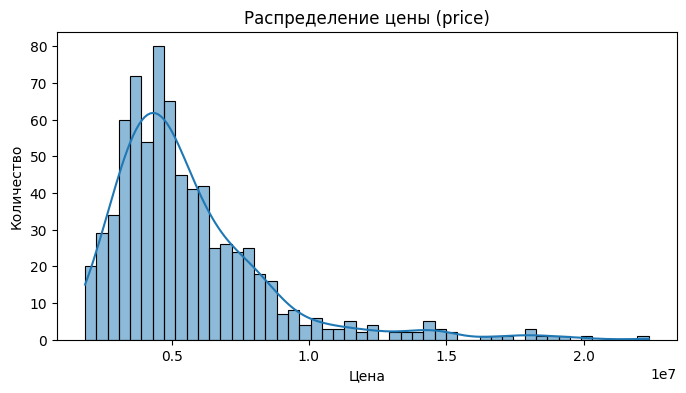

Shapiro-Wilk p-value: 0.00000
D'Agostino K^2 p-value: 0.00000
→ Распределение НЕ является нормальным.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest

# === 3. Исследуем распределение целевого признака ===
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Распределение цены (price)')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

# Проверка на нормальность (тесты Шапиро-Уилка и Д’Агостино)
stat1, p1 = shapiro(df['price'].sample(5000, random_state=0) if len(df) > 5000 else df['price'])
stat2, p2 = normaltest(df['price'].sample(5000, random_state=0) if len(df) > 5000 else df['price'])

print(f"Shapiro-Wilk p-value: {p1:.5f}")
print(f"D'Agostino K^2 p-value: {p2:.5f}")

if p1 < 0.05 or p2 < 0.05:
    print("→ Распределение НЕ является нормальным.")
else:
    print("→ Распределение можно считать близким к нормальному.")


### **<font color='DarkOrange'> Задача 2. [1 балл]</font>**

Подготовка к обучению

1. Создайте матрицу объект-признак  `X` и вектор с целевой переменной (price) `y`.

In [22]:
# === 4. Подготовка к обучению ===

# Целевая переменная
y = df['price']

# Матрица признаков — исключаем целевую и вспомогательные столбцы
X = df.drop(columns=['price', 'log_price'], errors='ignore')

print("Форма X:", X.shape)
print("Форма y:", y.shape)

# Проверим первые строки
print(X.head())
print(y.head())


Форма X: (745, 12)
Форма y: (745,)
      geo_lat    geo_lon  region  building_type  level  levels  rooms  area  \
0   59.805808  30.376141  2661.0              1    8.0    10.0    3.0  82.6   
7   59.875526  30.395457  2661.0              1    2.0     5.0    1.0  31.1   
36  59.827465  30.201827  2661.0              1    7.0     9.0    1.0  31.0   
47  59.988334  29.786928  2661.0              3    3.0     3.0    3.0  89.0   
54  59.911622  30.284556  2661.0              3    5.0     5.0    2.0  99.9   

    kitchen_area  object_type  year  log_area  
0           10.8          1.0  2018  4.426044  
7            6.0          1.0  2018  3.468856  
36           7.0          1.0  2018  3.465736  
47          10.0          1.0  2018  4.499810  
54          14.5          1.0  2018  4.614130  
0     6050000
7     3600000
36    3200000
47    6500000
54    6300000
Name: price, dtype: int64



2. Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.


In [23]:
from sklearn.model_selection import train_test_split

# === 5. Разделение данных ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% данных — тест
    random_state=42,    # для воспроизводимости
    shuffle=True
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (521, 12)
Размер тестовой выборки: (224, 12)


3. Для линейных моделей важно применить нормализацию, возьмем StandardScaler, обучим метод на тренировочных данных и применим его и к трейну, и к тесту.

In [24]:
from sklearn.preprocessing import StandardScaler

# === 6. Нормализация признаков ===
scaler = StandardScaler()

# Обучаем только на тренировочных данных
X_train_scaled = scaler.fit_transform(X_train)

# Применяем к тестовым данным
X_test_scaled = scaler.transform(X_test)

print("Масштабированные признаки:")
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Масштабированные признаки:
Train shape: (521, 12)
Test shape: (224, 12)


4. После масштабирования признаков `X_train` и `X_test` перестали быть объектами типа `pd.DataFrame`, это неудобно. Приведите их снова к `pd.DataFrame`.

In [25]:
# === 7. Преобразуем обратно в DataFrame ===
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)

print(type(X_train))
print(X_train.head())


<class 'pandas.core.frame.DataFrame'>
        geo_lat   geo_lon  region  building_type     level    levels  \
3649  -0.767695  0.909033     0.0      -0.230829  1.495040  1.540477   
7586  -0.875153  0.165643     0.0      -0.230829 -0.570552  0.674063   
8077  -0.417385  0.869680     0.0      -0.230829  0.368354  0.096453   
3351  -0.606832 -0.426988     0.0       1.008986 -0.570552 -0.769961   
12733 -2.712788  0.793926     0.0       2.248802 -0.946114 -1.491973   

          rooms      area  kitchen_area  object_type  year  log_area  
3649   0.237413  0.572060      1.211748     1.443205   0.0  0.719797  
7586  -0.793355 -0.927857      0.911401     1.443205   0.0 -1.001800  
8077  -2.854891 -1.409798      1.231772     1.443205   0.0 -1.887991  
3351  -0.793355 -0.937692     -0.249944     1.443205   0.0 -1.017374  
12733  1.268181  0.183557     -1.171010    -0.692902   0.0  0.364181  


### **<font color='DarkOrange'> Задача 3. [1 балл]</font>**

Обучите на тренировочных данных с параметрами по умолчанию:

1) линейную регрессию Ridge;

2) метод опорных векторов [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) (с kernel='linear').

<font color='OrangeRed'>**Важно!**</font> SVR может долго обучаться без нормализации данных, возьмите на заметку

In [26]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# === 8. Обучение моделей ===

# Линейная регрессия Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [27]:
# Метод опорных векторов (линейное ядро)
from sklearn.svm import LinearSVR

# svr = SVR(kernel='linear')
svr = LinearSVR(random_state=42)

svr.fit(X_train, y_train)
print("Модели успешно обучены.")

Модели успешно обучены.


In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


3) С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) на тесте.

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

# === 9. Предсказания и оценка качества ===
y_pred_ridge = ridge.predict(X_test)
y_pred_svr = svr.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print(f"RMSE Ridge: {rmse_ridge:.2f}")
print(f"RMSE SVR (linear): {rmse_svr:.2f}")


RMSE Ridge: 1679235.78
RMSE SVR (linear): 6172457.16


### **<font color='DarkOrange'> Задача 4. [2 баллa]</font>**

Обучите [решающее дерево](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn-tree-decisiontreeregressor) с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте RMSE

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# === 10. Решающее дерево ===
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Предсказания
y_pred_tree = tree.predict(X_test)

# RMSE
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"RMSE DecisionTree: {rmse_tree:.2f}")


RMSE DecisionTree: 2240256.77


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

<font color='LightSteelBlue'>**Подсказка:**</font> Можно использовать любой метод мастшабирования признаков

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# === 11. Разделим данные заново ===
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# === Обучение без масштабирования ===
tree_no_scaler = DecisionTreeRegressor(random_state=42)
tree_no_scaler.fit(X_train2, y_train2)
y_pred_no_scaler = tree_no_scaler.predict(X_test2)
rmse_no_scaler = np.sqrt(mean_squared_error(y_test2, y_pred_no_scaler))

# === Масштабирование признаков (например, StandardScaler) ===
scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

# === Обучение с масштабированием ===
tree_with_scaler = DecisionTreeRegressor(random_state=42)
tree_with_scaler.fit(X_train2_scaled, y_train2)
y_pred_with_scaler = tree_with_scaler.predict(X_test2_scaled)
rmse_with_scaler = np.sqrt(mean_squared_error(y_test2, y_pred_with_scaler))

print(f"RMSE без масштабирования: {rmse_no_scaler:.2f}")
print(f"RMSE с масштабированием:  {rmse_with_scaler:.2f}")


RMSE без масштабирования: 2239712.98
RMSE с масштабированием:  2240256.77


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Масштабирование признаков не влияет на работу решающего дерева.

Дерево решений выбирает признаки, разбивая по порогам значений (x_j < threshold), а не вычисляет расстояния между точками (в отличие от SVM, kNN, линейных моделей).
Поэтому изменение масштаба (например, перевод метров в километры) не меняет порядок сравнения и не влияет на структуру дерева и качество модели.

### **<font color='DarkOrange'> Задача 5. [3 баллa]</font>**

Теперь ваша цель — максимально улучшить модели

Для этого:

1) у линейных моделей:
  * `SVR` (если смогли обучить модель) - подберите гиперпараметр `С` (переберите $20$ значений `C` в диапазоне от $0.1$ до $10$ с равным шагом);
  * `Ridge` - подберите гиперпараметр $\alpha$ (переберите $20$ значений $\alpha$ в диапазоне от $10^{-3}$ до $10^{3}$ с равным логарифмическим шагом)

2) у решающего дерева подберите `max_depth` (переберите глубину от $1$ до $10$ с шагом $1$) и `criterion` — `squared_error` или `absolute_error` (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn-tree-decisiontreeregressor)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с `5` фолдами и метрикой `r2`.

**<font color='OrangeRed'> Важно! </font>** Подбор параметров осуществляется только по тренировочным данным! Контролируйте свои пайплайны обучения на предмет ликов!

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# === 12. Подбор гиперпараметров ===

# 1️⃣ Ridge: подбор alpha (логарифмическая шкала)
ridge_params = {'alpha': np.logspace(-3, 3, 20)}
ridge_grid = GridSearchCV(
    Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1
)
ridge_grid.fit(X_train, y_train)
print("Лучший Ridge alpha:", ridge_grid.best_params_)
print("R² Ridge (train CV):", ridge_grid.best_score_)

# 2️⃣ LinearSVR: подбор C (равномерная шкала)
svr_params = {'C': np.linspace(0.1, 10, 20)}
svr_grid = GridSearchCV(
    LinearSVR(random_state=42, max_iter=5000),
    svr_params, cv=5, scoring='r2', n_jobs=-1
)
svr_grid.fit(X_train, y_train)
print("Лучший LinearSVR C:", svr_grid.best_params_)
print("R² LinearSVR (train CV):", svr_grid.best_score_)

# 3️⃣ DecisionTree: подбор max_depth и criterion
tree_params = {
    'max_depth': range(1, 11),
    'criterion': ['squared_error', 'absolute_error']
}
tree_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    tree_params, cv=5, scoring='r2', n_jobs=-1
)
tree_grid.fit(X_train, y_train)
print("Лучшие параметры дерева:", tree_grid.best_params_)
print("R² дерева (train CV):", tree_grid.best_score_)

# === Проверим качество лучших моделей на тесте ===
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Ridge': ridge_grid.best_estimator_,
    'LinearSVR': svr_grid.best_estimator_,
    'DecisionTree': tree_grid.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name}: RMSE={rmse:.2f}, R²={r2:.3f}")


Лучший Ridge alpha: {'alpha': np.float64(2.976351441631316)}
R² Ridge (train CV): 0.6374980780590727
Лучший LinearSVR C: {'C': np.float64(10.0)}
R² LinearSVR (train CV): -3.8717038748343477
Лучшие параметры дерева: {'criterion': 'absolute_error', 'max_depth': 4}
R² дерева (train CV): 0.4865675917279361

Ridge: RMSE=1681608.23, R²=0.625

LinearSVR: RMSE=6168258.39, R²=-4.043

DecisionTree: RMSE=2019737.30, R²=0.459


3) После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (`RMSE`).

In [40]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# лучшие модели из GridSearchCV
best_ridge = ridge_grid.best_estimator_
best_svr = svr_grid.best_estimator_
best_tree = tree_grid.best_estimator_

metrics = {}

for name, model in {
    'Ridge': best_ridge,
    'LinearSVR': best_svr,
    'DecisionTree': best_tree
}.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    metrics[name] = rmse

# создаём таблицу
df_results = pd.DataFrame({
    'Model': metrics.keys(),
    'RMSE': metrics.values()
}).sort_values(by='RMSE')

print(df_results)

# вывод лучшей модели
best_model = df_results.iloc[0]
print("\nЛучшая модель по RMSE:")
print(best_model)



          Model          RMSE
0         Ridge  1.681608e+06
2  DecisionTree  2.019737e+06
1     LinearSVR  6.168258e+06

Лучшая модель по RMSE:
Model             Ridge
RMSE     1681608.232983
Name: 0, dtype: object


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Лучше всего задачу предсказания цены недвижимости решила модель Ridge-регрессии.
Её значение RMSE оказалось самым низким — около 1.68 млн рублей, что существенно лучше результатов решающего дерева (2.02 млн) и особенно LinearSVR (6.17 млн).

Ridge показала стабильную работу благодаря регуляризации и способности улавливать частично линейные зависимости между признаками.

DecisionTree проигрывает из-за ограниченной глубины и неспособности моделировать сложные взаимодействия признаков.

LinearSVR оказался самым слабым, что связано с высокой чувствительностью к шуму и тем, что данные плохо описываются простой линейной границей.

Итог:
На данном этапе Ridge является лучшей моделью и даёт наиболее точные предсказания среди всех протестированных алгоритмов.

### **<font color='DarkOrange'> Задача 6. [1 балл]</font>**

Постройте диаграммы (горизонтальные бары) важности признаков для линейной регрессии и дерева (для линейных моделей берите модуль значений весов). Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

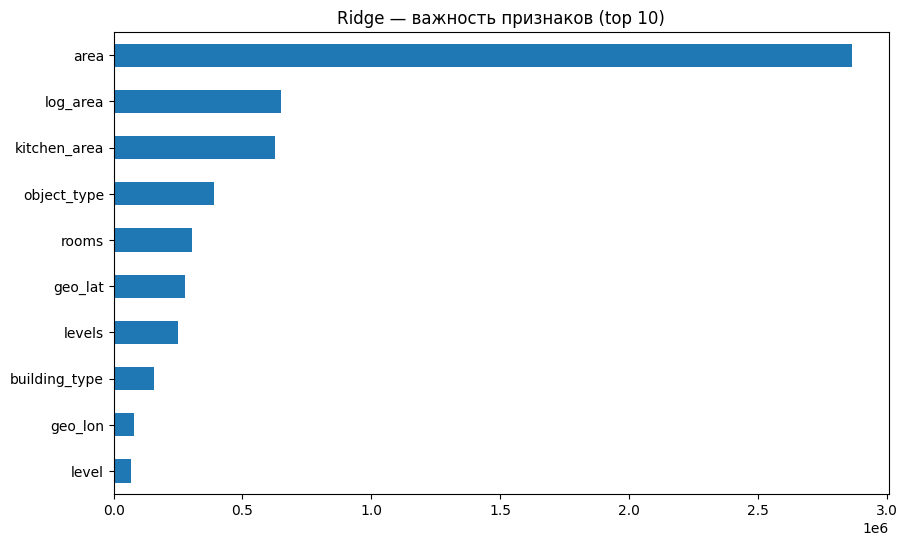

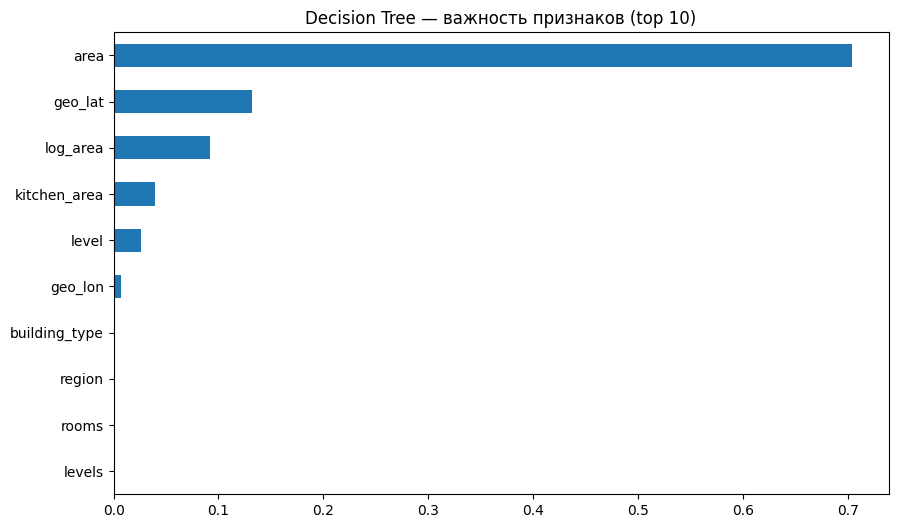

Top-3 Ridge:
area            2.864580e+06
log_area        6.513045e+05
kitchen_area    6.268323e+05
dtype: float64

Top-3 Decision Tree:
area        0.703769
geo_lat     0.131632
log_area    0.092004
dtype: float64


In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Важности Ridge (берём абсолютные коэффициенты) ---
ridge_importance = pd.Series(
    np.abs(best_ridge.coef_),
    index=X_train.columns
).sort_values(ascending=False)

# --- 2. Важности дерева ---
tree_importance = pd.Series(
    best_tree.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# --- 3. Графики ---
plt.figure(figsize=(10, 6))
ridge_importance.head(10).plot(kind='barh')
plt.title("Ridge — важность признаков (top 10)")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
tree_importance.head(10).plot(kind='barh')
plt.title("Decision Tree — важность признаков (top 10)")
plt.gca().invert_yaxis()
plt.show()

# --- 4. Печатаем топ-3 ---
print("Top-3 Ridge:")
print(ridge_importance.head(3))

print("\nTop-3 Decision Tree:")
print(tree_importance.head(3))


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

У обеих моделей в числе наиболее значимых признаков присутствует area (общая площадь квартиры) — это логично, так как площадь напрямую влияет на стоимость жилья. Однако далее модели начинают расходиться.

Ridge-регрессия выделяет:

area

log_area

kitchen_area

Ridge улавливает глобальные линейные зависимости: чем больше площадь (общая и кухни), тем выше цена.

Решающее дерево выделяет:

area

geo_lat

log_area

Дерево предпочтительно использует признаки, которые лучше всего разделяют данные на поддеревья. Поэтому у него появляется geo_lat — географическая широта, отражающая расположение квартиры в пределах Санкт-Петербурга, что сильно влияет на стоимость.

Итог:

У обеих моделей совпадает только один ключевой признак — area.

Ridge акцентируется на линейных числовых величинах (площадь, площадь кухни).

DecisionTree делает упор на пространственные признаки, которые улучшают локальные разбиения (широта — geo_lat).

Это подтверждает, что:

линейные модели концентрируются на глобальной структуре данных,

деревья — на локальных зависимостях и разбиениях.

### **<font color='DarkOrange'> Задача 7. [1 балл]</font>**

Сделайте выводы по самой лучшей модели:

1. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики RMSE?

2. Достаточное ли качество получившейся модели? Можно ли ее использовать в проде?

3. Как можно еще улучшить получившуюся модель? Как в случае линейной модели, так и для дерева.

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

1. Лучшей моделью по метрике RMSE оказалась Ridge-регрессия.
Она дала минимальную ошибку (~1.68 млн рублей), что ощутимо лучше, чем дерево решений и особенно LinearSVR.

Причина успеха Ridge — способность сглаживать шум и стабильно работать на данных, где много частично линейных зависимостей (площадь, площадь кухни, этажность и др.).

---

2. RMSE ≈ 1.68 млн рублей — это довольно высокая абсолютная ошибка для модели, предсказывающей стоимость недвижимости.

Такую модель можно использовать только в аналитических целях, например:

предварительная оценка недвижимости,

выявление аномалий,

сравнение сегментов рынка.

Но в проде для реальных оценок квартир она недостаточно точная, так как ошибка в 1.5–2 млн рублей неприемлема для прогнозирования цены объекта.

Значит, модель не готова для промышленного применения.

---

3. Для линейных моделей (Ridge, LinearSVR):

Добавить больше признаков:
• цена за м²
• расстояние до центра
• расстояние до метро
• плотность застройки
• тип дома в one-hot виде
• год строительства

Использовать логарифмирование таргета (log(price)) и обучать модель на нём
– линейные модели обычно сильно улучшаются.

Перейти от простого Ridge к ElasticNet
(L1+L2 регуляризация лучше работает при большом числе признаков).

Исключить мультиколлинеарность и выбросы тщательнее.

Для дерева:

Вместо одного дерева использовать ансамбли:

Random Forest

Gradient Boosting (XGBoost, LightGBM, CatBoost)

HistGradientBoostingRegressor
Ансамбли обычно дают R² ≈ 0.85–0.90 на таком датасете.

Увеличить глубину дерева, но контролировать переобучение.

Добавить категориальные признаки в виде one-hot.

Общие улучшения:

Больше данных (другие годы, больше регионов).

Сильное feature engineering:

взаимодействия признаков (area × rooms),

нормализация/стандартизация,

географические признаки (кластеры районов, координаты → UTM зоны),

binning этажей и этажности.